In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


# Import Data

In [2]:
df = pd.read_csv('ecommerce_data.csv')

# Exploratory Data Analysis

In [3]:
df.shape

(250000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Gender                 250000 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 19.1+ MB


In [6]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000


In [5]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,59,1.0,Female
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,18,1.0,Female
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,19,1.0,Female
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,68,0.0,Female
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,44,1.0,Female


In [7]:
# Check for duplicates
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


In [8]:
# Check missing values
print(df.isnull().sum())

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Gender                       0
dtype: int64


# Data Cleaning

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

In [9]:
# Handle missing values
df.dropna(subset=['Returns'], inplace=True)

In [11]:
df.shape

(202618, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202618 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            202618 non-null  int64  
 1   Purchase Date          202618 non-null  object 
 2   Product Category       202618 non-null  object 
 3   Product Price          202618 non-null  int64  
 4   Quantity               202618 non-null  int64  
 5   Total Purchase Amount  202618 non-null  int64  
 6   Payment Method         202618 non-null  object 
 7   Customer Age           202618 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Gender                 202618 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 17.0+ MB


# Feature Engineering

In [13]:
# Convert 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202618 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            202618 non-null  int64         
 1   Purchase Date          202618 non-null  datetime64[ns]
 2   Product Category       202618 non-null  object        
 3   Product Price          202618 non-null  int64         
 4   Quantity               202618 non-null  int64         
 5   Total Purchase Amount  202618 non-null  int64         
 6   Payment Method         202618 non-null  object        
 7   Customer Age           202618 non-null  int64         
 8   Returns                202618 non-null  float64       
 9   Gender                 202618 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 17.0+ MB


In [15]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,59,1.0,Female
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,18,1.0,Female
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,19,1.0,Female
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,68,0.0,Female
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,44,1.0,Female


In [18]:
# Derive new features from 'Purchase Date'
df['Day of Week'] = df['Purchase Date'].dt.day_name()
df['Month'] = df['Purchase Date'].dt.month_name()
df['Quarter'] = df['Purchase Date'].dt.quarter

In [20]:
# Age group binning
age_bins = [0, 18, 25, 35, 45, 60, 100]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels)


In [22]:
# High-end product indicator (e.g., Product Price > 75th percentile)
price_threshold = df['Product Price'].quantile(0.75)
df['High-End Product'] = df['Product Price'] > price_threshold

In [23]:
# Return indicator as boolean
df['Was Returned'] = df['Returns'].astype(bool)

In [33]:
# Purchase frequency and total spent per customer
customer_stats = df.groupby('Customer ID').agg(
    Purchase_Frequency=('Customer ID', 'count'),
    Total_Spent=('Total Purchase Amount', 'sum'),
    Return_Rate=('Was Returned', 'mean'),
    Avg_Spend_Per_Purchase=('Total Purchase Amount', 'mean')
).reset_index()

# Merge customer stats back to original dataframe
df = df.merge(customer_stats, on='Customer ID', how='left')

In [34]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Day of Week,Month,Quarter,Age Group,High-End Product,Was Returned,Purchase_Frequency,Total_Spent,Return_Rate,Avg_Spend_Per_Purchase
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,59,1.0,Female,Wednesday,May,2,46-60,False,True,5,10755,0.8,2151.0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,18,1.0,Female,Sunday,May,2,<18,False,True,5,10755,0.8,2151.0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,19,1.0,Female,Monday,July,3,18-25,True,True,5,10755,0.8,2151.0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,68,0.0,Female,Tuesday,January,1,60+,True,False,5,10755,0.8,2151.0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,44,1.0,Female,Saturday,May,2,36-45,False,True,5,10755,0.8,2151.0


# Visualizations

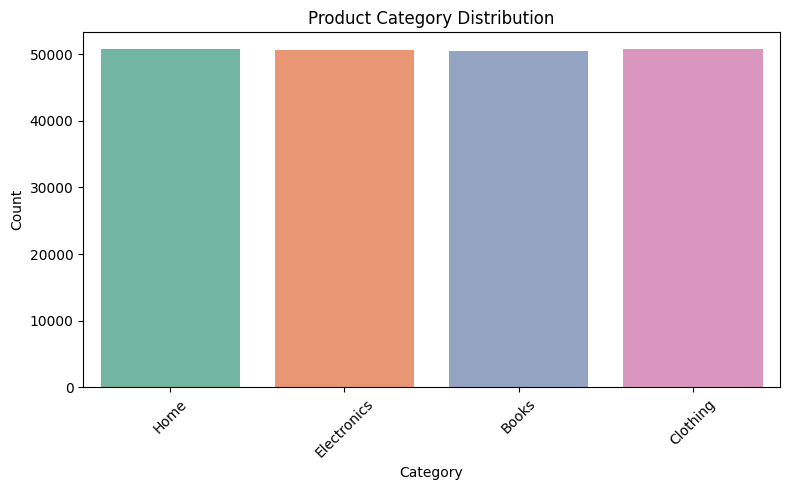

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Product Category', data=df, palette='Set2')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

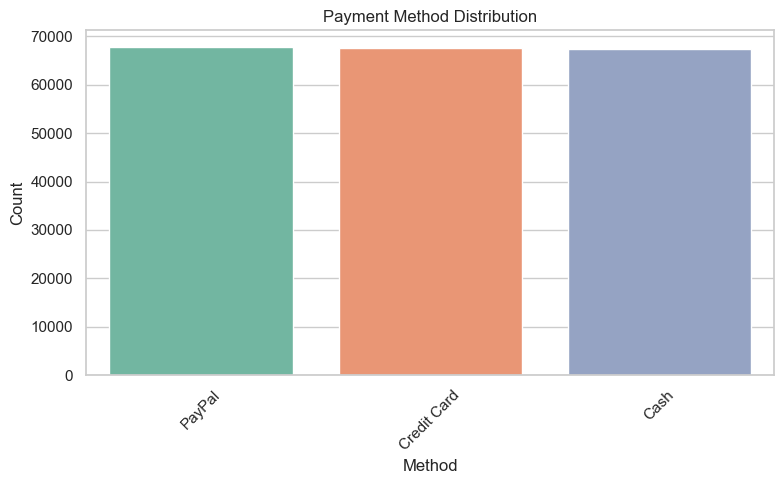

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Payment Method', data=df, palette='Set2')
plt.title('Payment Method Distribution')
plt.xlabel('Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

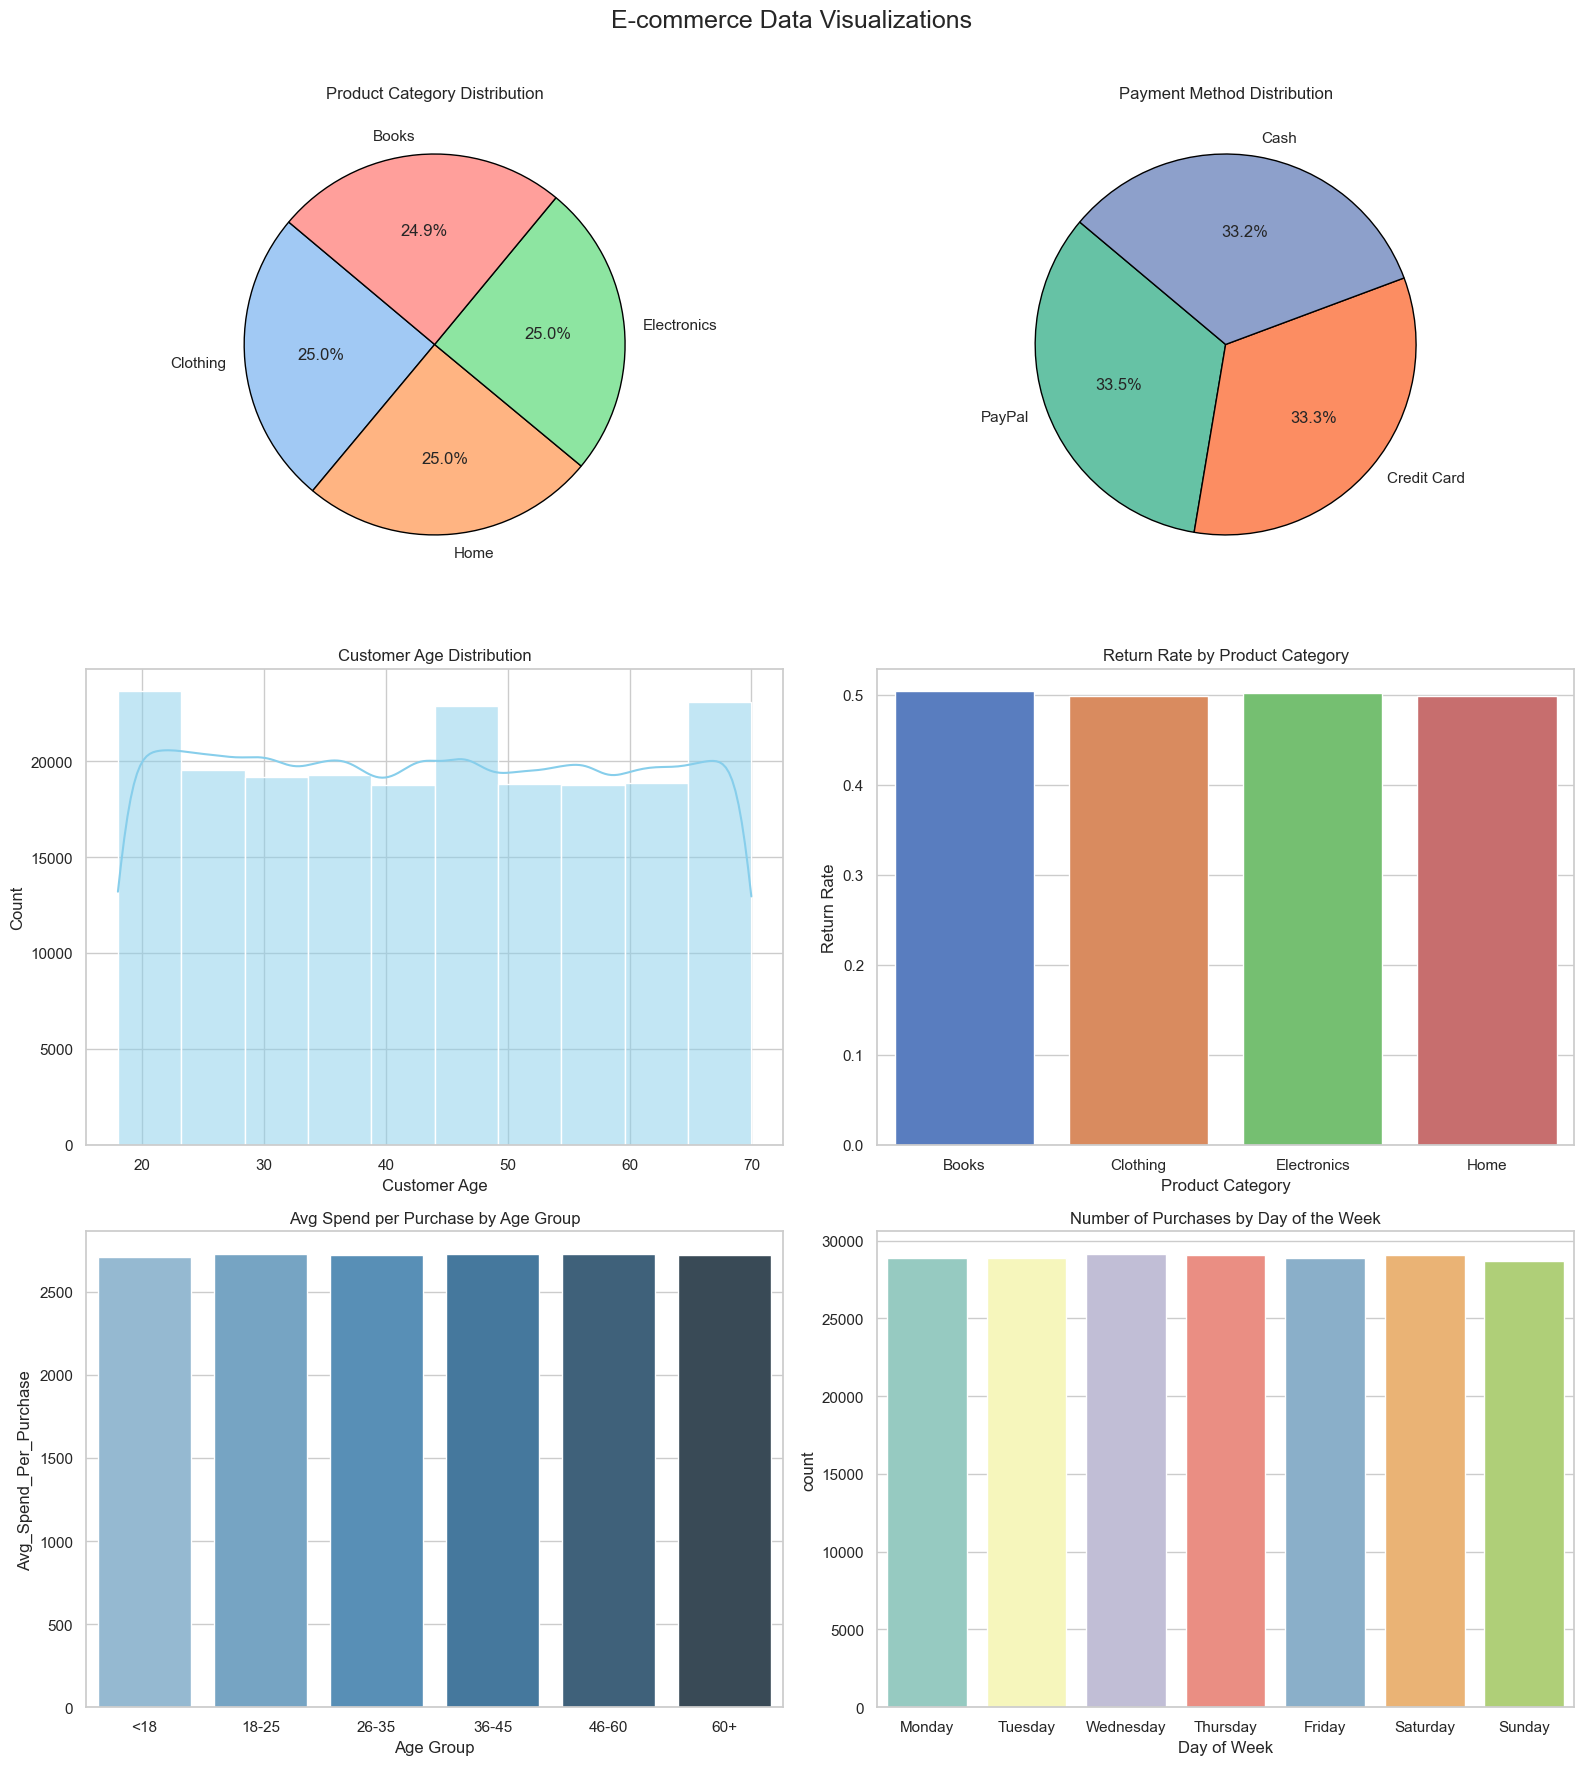

In [35]:

sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('E-commerce Data Visualizations', fontsize=18)

# 1. Product Category distribution (Pie chart)
df['Product Category'].value_counts().plot.pie(
    ax=axes[0, 0],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)
axes[0, 0].set_title('Product Category Distribution')
axes[0, 0].set_ylabel('')

# 2. Payment Method distribution (Pie chart)
df['Payment Method'].value_counts().plot.pie(
    ax=axes[0, 1],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2'),
    wedgeprops={'edgecolor': 'black'}
)
axes[0, 1].set_title('Payment Method Distribution')
axes[0, 1].set_ylabel('')

# 3. Histogram of Customer Age
sns.histplot(data=df, x='Customer Age', bins=10, kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Customer Age Distribution')

# 4. Return Rate by Product Category
sns.barplot(
    data=df.groupby('Product Category')['Was Returned'].mean().reset_index(),
    x='Product Category', y='Was Returned', ax=axes[1, 1], palette='muted'
)
axes[1, 1].set_title('Return Rate by Product Category')
axes[1, 1].set_ylabel('Return Rate')

# 5. Avg Spend per Purchase by Age Group
sns.barplot(
    data=df.groupby('Age Group')['Avg_Spend_Per_Purchase'].mean().reset_index(),
    x='Age Group', y='Avg_Spend_Per_Purchase', ax=axes[2, 0], palette='Blues_d'
)
axes[2, 0].set_title('Avg Spend per Purchase by Age Group')

# 6. Purchases by Day of the Week
sns.countplot(data=df, x='Day of Week', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ax=axes[2, 1], palette='Set3')
axes[2, 1].set_title('Number of Purchases by Day of the Week')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


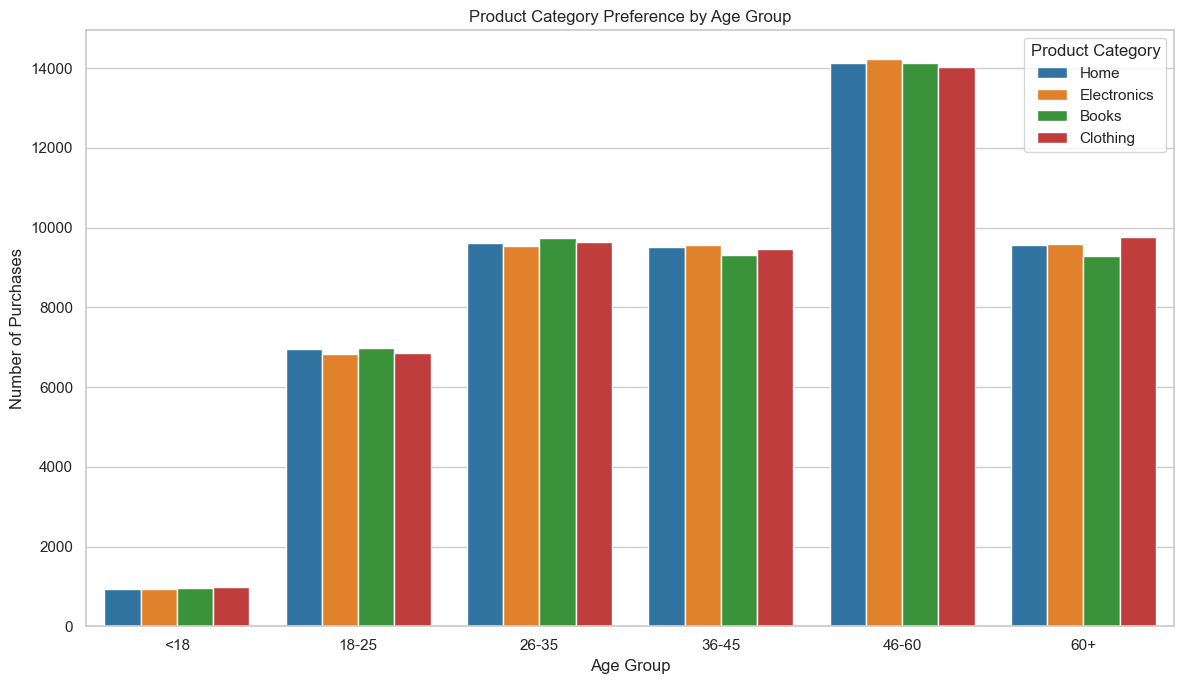

In [30]:
#Countplot to visualize product category preferences by age group
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Age Group', hue='Product Category', palette='tab10')
plt.title('Product Category Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


# Predictive Modeling

## 1.Predict Customer Churn using Random Forest

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202618 entries, 0 to 202617
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Customer ID             202618 non-null  int64         
 1   Purchase Date           202618 non-null  datetime64[ns]
 2   Product Category        202618 non-null  object        
 3   Product Price           202618 non-null  int64         
 4   Quantity                202618 non-null  int64         
 5   Total Purchase Amount   202618 non-null  int64         
 6   Payment Method          202618 non-null  object        
 7   Customer Age            202618 non-null  int64         
 8   Returns                 202618 non-null  float64       
 9   Gender                  202618 non-null  object        
 10  Day of Week             202618 non-null  object        
 11  Month                   202618 non-null  object        
 12  Quarter                 202618

In [36]:
# Our goal is to predict whether a customer will return again (stay) or not (churn) based on historical behavior.
# Step 1: Create churn label based on recency (e.g., no purchase in the last 180 days)
latest_date = df['Purchase Date'].max()
cutoff_date = latest_date - pd.Timedelta(days=180)

# Identify last purchase date per customer
last_purchase = df.groupby('Customer ID')['Purchase Date'].max().reset_index()
last_purchase['Churned'] = last_purchase['Purchase Date'] < cutoff_date

# Merge churn label back to main dataframe
df = df.merge(last_purchase[['Customer ID', 'Churned']], on='Customer ID', how='left')

# Step 2: Select features for modeling
features = [
    'Customer Age', 'Gender', 'Purchase_Frequency',
    'Total_Spent', 'Return_Rate', 'Avg_Spend_Per_Purchase'
]

# Encode categorical variables
df_model = df.drop_duplicates(subset='Customer ID')  # one record per customer
df_model = df_model[features + ['Churned']].copy()
df_model = pd.get_dummies(df_model, columns=['Gender'], drop_first=True)


X = df_model.drop(columns=['Churned'])
y = df_model['Churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix

({'False': {'precision': 0.5028326180257511,
   'recall': 0.47502432695426533,
   'f1-score': 0.48853306646651656,
   'support': 6166.0},
  'True': {'precision': 0.6370669357551295,
   'recall': 0.662392166006062,
   'f1-score': 0.6494827684745956,
   'support': 8578.0},
  'accuracy': 0.5840341833966359,
  'macro avg': {'precision': 0.5699497768904402,
   'recall': 0.5687082464801636,
   'f1-score': 0.5690079174705561,
   'support': 14744.0},
  'weighted avg': {'precision': 0.5809296051040614,
   'recall': 0.5840341833966359,
   'f1-score': 0.5821729568507612,
   'support': 14744.0}},
 array([[2929, 3237],
        [2896, 5682]], dtype=int64))

## 2.Build a Product Recommender System

In [38]:
class ProductRecommender:
    def __init__(self, df):
        self.df = df
        self.interaction_matrix = None
        self.customer_similarity_df = None
        self.scaler = StandardScaler()
        self._build_matrices()
    
    def _build_matrices(self):
        """Build the user-item interaction matrix and compute similarities"""
        # Step 1: Build User-Product interaction matrix
        self.interaction_matrix = self.df.pivot_table(
            index='Customer ID',
            columns='Product Category',
            values='Total Purchase Amount',
            aggfunc='sum',
            fill_value=0
        )
        
        print(f"Interaction matrix shape: {self.interaction_matrix.shape}")
        print(f"Number of customers: {len(self.interaction_matrix.index)}")
        print(f"Number of categories: {len(self.interaction_matrix.columns)}")
        
        # Step 2: Compute customer similarity using cosine similarity
        customer_similarity = cosine_similarity(self.interaction_matrix)
        self.customer_similarity_df = pd.DataFrame(
            customer_similarity, 
            index=self.interaction_matrix.index, 
            columns=self.interaction_matrix.index
        )
    
    def get_customer_profile(self, customer_id):
        """Get the spending profile of a specific customer"""
        if customer_id not in self.interaction_matrix.index:
            return f"Customer ID {customer_id} not found."
        
        profile = self.interaction_matrix.loc[customer_id]
        profile_df = profile[profile > 0].sort_values(ascending=False)
        return profile_df
    
    def find_similar_customers(self, customer_id, top_n=5):
        """Find the most similar customers to the given customer"""
        if customer_id not in self.customer_similarity_df.index:
            return f"Customer ID {customer_id} not found."
        
        # Get similarity scores (excluding the customer themselves)
        similar_customers = self.customer_similarity_df[customer_id].sort_values(ascending=False).iloc[1:top_n+1]
        return similar_customers
    
    def recommend_products(self, customer_id, top_n=3, min_similarity=0.1):
        """
        Recommend products to a customer based on similar customers' behavior
        
        Parameters:
        - customer_id: Target customer
        - top_n: Number of recommendations to return
        - min_similarity: Minimum similarity threshold for considering customers
        """
        if customer_id not in self.customer_similarity_df.index:
            return f"Customer ID {customer_id} not found."
        
        # Get top similar customers with minimum similarity threshold
        similar_customers = self.customer_similarity_df[customer_id].sort_values(ascending=False).iloc[1:6]
        similar_customers = similar_customers[similar_customers >= min_similarity]
        
        if len(similar_customers) == 0:
            return "No similar customers found with sufficient similarity."
        
        # Get current customer's purchase profile
        customer_profile = self.interaction_matrix.loc[customer_id]
        
        # Calculate weighted recommendations based on similar customers
        weighted_scores = pd.Series(0.0, index=self.interaction_matrix.columns)
        
        for similar_customer, similarity_score in similar_customers.items():
            similar_profile = self.interaction_matrix.loc[similar_customer]
            weighted_scores += similar_profile * similarity_score
        
        # Normalize by sum of similarity scores
        weighted_scores = weighted_scores / similar_customers.sum()
        
        # Only recommend categories the customer hasn't purchased (or purchased very little)
        recommendations = weighted_scores.copy()
        
        # Filter out categories where customer already spent significant amount
        customer_threshold = customer_profile.mean() * 0.5  # 50% of average spending
        for category in customer_profile.index:
            if customer_profile[category] > customer_threshold:
                recommendations[category] = 0
        
        # Get top recommendations
        top_recommendations = recommendations.sort_values(ascending=False).head(top_n)
        top_recommendations = top_recommendations[top_recommendations > 0]
        
        return top_recommendations.index.tolist(), top_recommendations.values
    
    def get_recommendation_explanation(self, customer_id, top_n=3):
        """Provide detailed explanation for recommendations"""
        if customer_id not in self.customer_similarity_df.index:
            return f"Customer ID {customer_id} not found."
        
        # Get customer profile
        customer_profile = self.get_customer_profile(customer_id)
        
        # Get similar customers
        similar_customers = self.find_similar_customers(customer_id, 5)
        
        # Get recommendations
        recommendations, scores = self.recommend_products(customer_id, top_n)
        
        print(f"\n=== RECOMMENDATION REPORT FOR CUSTOMER {customer_id} ===")
        print("\n1. CUSTOMER'S CURRENT SPENDING PROFILE:")
        if isinstance(customer_profile, pd.Series) and len(customer_profile) > 0:
            for category, amount in customer_profile.items():
                print(f"   • {category}: ${amount:,.2f}")
        else:
            print("   • No previous purchases found")
        
        print(f"\n2. TOP 5 MOST SIMILAR CUSTOMERS:")
        for customer, similarity in similar_customers.items():
            print(f"   • Customer {customer}: {similarity:.3f} similarity")
        
        print(f"\n3. RECOMMENDED CATEGORIES:")
        if recommendations:
            for i, (category, score) in enumerate(zip(recommendations, scores), 1):
                print(f"   {i}. {category} (Score: {score:.2f})")
                
                # Show which similar customers bought from this category
                category_buyers = []
                for sim_customer in similar_customers.index:
                    amount = self.interaction_matrix.loc[sim_customer, category]
                    if amount > 0:
                        category_buyers.append(f"Customer {sim_customer}: ${amount:,.2f}")
                
                if category_buyers:
                    print(f"      Similar customers who bought from {category}:")
                    for buyer in category_buyers[:3]:  # Show top 3
                        print(f"        - {buyer}")
        else:
            print("   No suitable recommendations found.")
        
        return recommendations
    
    def visualize_customer_similarity(self, customer_id, top_n=10):
        """Visualize customer similarity matrix"""
        if customer_id not in self.customer_similarity_df.index:
            print(f"Customer ID {customer_id} not found.")
            return
        
        # Get top similar customers
        similar_customers = self.find_similar_customers(customer_id, top_n)
        
        plt.figure(figsize=(10, 6))
        similar_customers.plot(kind='bar')
        plt.title(f'Top {top_n} Most Similar Customers to Customer {customer_id}')
        plt.xlabel('Customer ID')
        plt.ylabel('Cosine Similarity')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    def analyze_category_popularity(self):
        """Analyze overall category popularity"""
        category_totals = self.interaction_matrix.sum().sort_values(ascending=False)
        category_customers = (self.interaction_matrix > 0).sum().sort_values(ascending=False)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Total spending by category
        category_totals.plot(kind='bar', ax=ax1)
        ax1.set_title('Total Spending by Category')
        ax1.set_ylabel('Total Amount ($)')
        ax1.tick_params(axis='x', rotation=45)
        
        # Number of customers by category
        category_customers.plot(kind='bar', ax=ax2)
        ax2.set_title('Number of Customers by Category')
        ax2.set_ylabel('Number of Customers')
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        return category_totals, category_customers





Interaction matrix shape: (49146, 4)
Number of customers: 49146
Number of categories: 4
Customer Profile:
Product Category
Books          4943
Electronics    3385
Home           2427
Name: 44605, dtype: int64 

Similar Customers:
Customer ID
32754    0.999945
42321    0.999909
33491    0.999844
16337    0.999773
17970    0.999760
Name: 44605, dtype: float64 

Recommendations:
[] 

Recommendation Explanation:

=== RECOMMENDATION REPORT FOR CUSTOMER 44605 ===

1. CUSTOMER'S CURRENT SPENDING PROFILE:
   • Books: $4,943.00
   • Electronics: $3,385.00
   • Home: $2,427.00

2. TOP 5 MOST SIMILAR CUSTOMERS:
   • Customer 32754: 1.000 similarity
   • Customer 42321: 1.000 similarity
   • Customer 33491: 1.000 similarity
   • Customer 16337: 1.000 similarity
   • Customer 17970: 1.000 similarity

3. RECOMMENDED CATEGORIES:
   No suitable recommendations found.


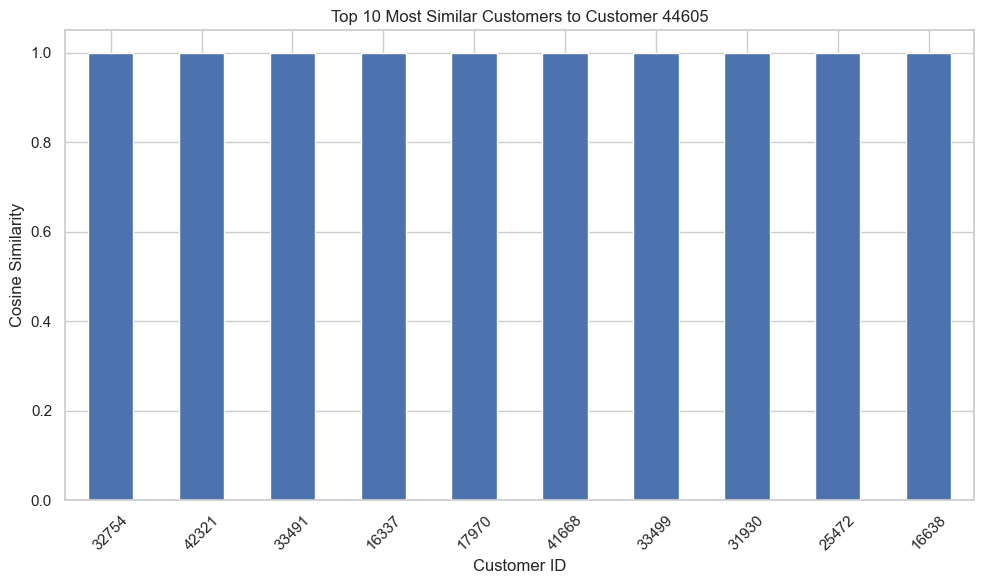

In [39]:
# --- Use the recommender system with a real customer ID ---
recommender = ProductRecommender(df)

# Choose a real customer ID from your dataset
customer_id = 44605

# View customer profile
print("Customer Profile:")
print(recommender.get_customer_profile(customer_id), "\n")

# Find similar customers
print("Similar Customers:")
print(recommender.find_similar_customers(customer_id), "\n")

# Get recommended product categories
print("Recommendations:")
recommended, scores = recommender.recommend_products(customer_id)
print(list(zip(recommended, scores)), "\n")

# Show full explanation
print("Recommendation Explanation:")
recommender.get_recommendation_explanation(customer_id)

# Visualize similarity
recommender.visualize_customer_similarity(customer_id)